#**Data Preprocessing**


In [2]:
!conda install seaborn -y
!conda install scikit-learn -y


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 25.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 25.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/abir_hossain/anaconda3

  added / updated specs:
    - pytorch
    - pytorch-cuda=11.8
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    

In [1]:
# # #step 1: importing library
# # import pandas as pd
# # import numpy as np
# # import seaborn as sns
# # import matplotlib.pyplot as plt
# # import cuml
# # from cuml.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
# # from cuml.model_selection import train_test_split
# # from cuml.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
# # from cuml.ensemble import RandomForestRegressor, GradientBoostingRegressor
# # from cuml.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


import cudf
import cuml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model imports from cuML and scikit-learn
from cuml import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor  # CPU version from scikit-learn
from cuml.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  # CPU version from scikit-learn
from cuml.linear_model import Ridge
from cuml.model_selection import train_test_split
from cuml.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Verify installed versions of cudf and cuml
print(cudf.__version__)  # Should print the version of cudf
print(cuml.__version__)  # Should print the version of cuml
#step 1: importing library
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


23.06.01
23.06.00


In [5]:
!nvidia-smi 

Thu Jan 23 19:25:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.72                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...    On  |   00000000:01:00.0  On |                  N/A |
|  0%   38C    P8              8W /  320W |    1277MiB /  16376MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

####Reading Data

GPU Reset couldn't run because GPU 00000000:01:00.0 is the primary GPU.


In [43]:
#step 2 Reading Data
df1=pd.read_csv('422 datasets/madrid_2001.csv')
df2=pd.read_csv('422 datasets/madrid_2002.csv')
df3=pd.read_csv('422 datasets/madrid_2003.csv')
df4=pd.read_csv('422 datasets/madrid_2004.csv')
df5=pd.read_csv('422 datasets/madrid_2005.csv')
df6=pd.read_csv('422 datasets/madrid_2006.csv')
df7=pd.read_csv('422 datasets/madrid_2007.csv')
df8=pd.read_csv('422 datasets/madrid_2008.csv')
df9=pd.read_csv('422 datasets/madrid_2009.csv')
df10=pd.read_csv('422 datasets/madrid_2010.csv')
df11=pd.read_csv('422 datasets/madrid_2011.csv')
df12=pd.read_csv('422 datasets/madrid_2012.csv')
df13=pd.read_csv('422 datasets/madrid_2013.csv')
df14=pd.read_csv('422 datasets/madrid_2014.csv')
df15=pd.read_csv('422 datasets/madrid_2015.csv')
df16=pd.read_csv('422 datasets/madrid_2016.csv')
df17=pd.read_csv('422 datasets/madrid_2017.csv')
df18=pd.read_csv('422 datasets/madrid_2018.csv')

df=pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9, df10, df11,df12,df13,df14,df15,df16, df17,df18], axis=0)
df = df.reset_index(drop=True)
df_init=df.copy()

In [5]:
print('Features:')
for i,j in enumerate(df.columns):
  print(i+1,'->',j)

Features:
1 -> date
2 -> BEN
3 -> CO
4 -> EBE
5 -> MXY
6 -> NMHC
7 -> NO_2
8 -> NOx
9 -> OXY
10 -> O_3
11 -> PM10
12 -> PXY
13 -> SO_2
14 -> TCH
15 -> TOL
16 -> station
17 -> PM25
18 -> NO
19 -> CH4


####First Five Value


In [6]:
df.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
1,2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


####Last Five Values

In [7]:
df.tail()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,NaN,0.5,NaN,NaN,NaN,91.0,192.0,NaN,1.0,35.0,NaN,NaN,NaN,NaN,28079056,22.0,66.0,NaN
3808220,2018-02-01 00:00:00,NaN,0.7,NaN,NaN,NaN,107.0,241.0,NaN,NaN,29.0,NaN,15.0,NaN,NaN,28079057,NaN,87.0,NaN
3808221,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,48.0,91.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058,NaN,28.0,NaN
3808222,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,103.0,320.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079059,NaN,141.0,NaN
3808223,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,96.0,202.0,NaN,3.0,26.0,NaN,NaN,NaN,NaN,28079060,NaN,69.0,NaN


####Description Of Dataset

In [8]:
#shape
print('Shape:(row,col)')
print(df.shape)
print('***'*10)
#information of the datas
print('Information:')
print(df.info())
print('***'*10)


Shape:(row,col)
(3808224, 19)
******************************
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 19 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   MXY      float64
 5   NMHC     float64
 6   NO_2     float64
 7   NOx      float64
 8   OXY      float64
 9   O_3      float64
 10  PM10     float64
 11  PXY      float64
 12  SO_2     float64
 13  TCH      float64
 14  TOL      float64
 15  station  int64  
 16  PM25     float64
 17  NO       float64
 18  CH4      float64
dtypes: float64(17), int64(1), object(1)
memory usage: 552.0+ MB
None
******************************


#Visualizing Data

####Dsecription of the Data

In [9]:
#descriptive statistics (numerical)
print(df.describe().T)

             count          mean         std          min          25%  \
BEN      1041684.0  1.257431e+00    1.910831         0.00         0.21   
CO       2651012.0  5.503838e-01    0.535448         0.00         0.26   
EBE      1001724.0  1.407927e+00    2.146109         0.00         0.35   
MXY       315415.0  4.650394e+00    5.599223         0.00         1.20   
NMHC     1085312.0  1.873865e-01    0.153953         0.00         0.09   
NO_2     3787050.0  5.047151e+01   34.552876         0.00        24.00   
NOx      2376275.0  1.093188e+02  110.287083         0.00        40.00   
OXY       315695.0  2.280912e+00    2.639609         0.00         0.96   
O_3      2991732.0  3.982616e+01   30.392489         0.00        12.71   
PM10     2861255.0  2.893654e+01   25.948586         0.00        11.50   
PXY       315584.0  2.056178e+00    2.395130         0.00         0.80   
SO_2     2775960.0  1.065539e+01    9.121267         0.00         5.84   
TCH      1086441.0  1.435882e+00    0.

###Histogram to understand the distribution

                       date
count               3808224
unique               151896
top     2003-07-21 13:00:00
freq                     28


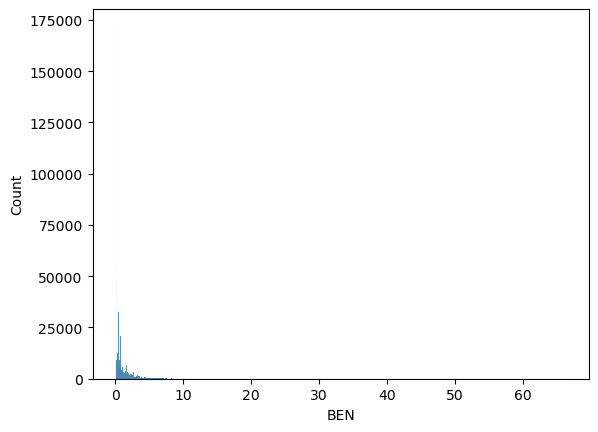

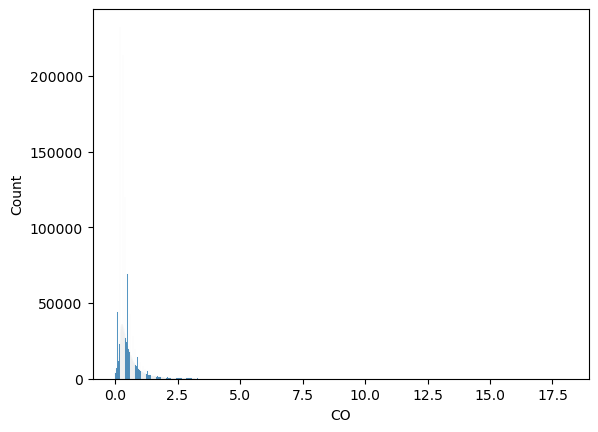

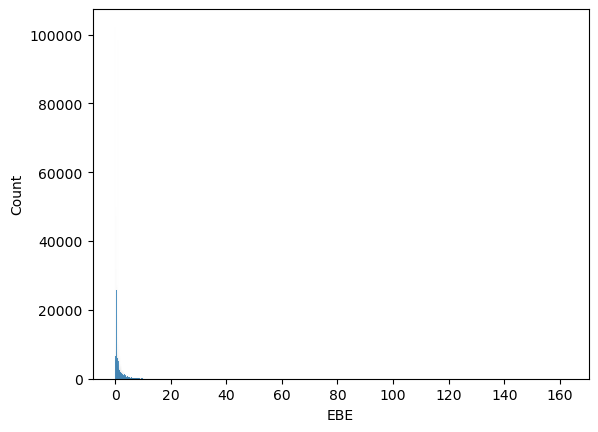

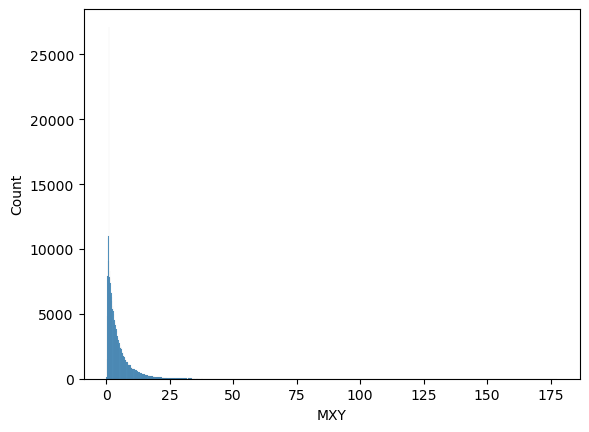

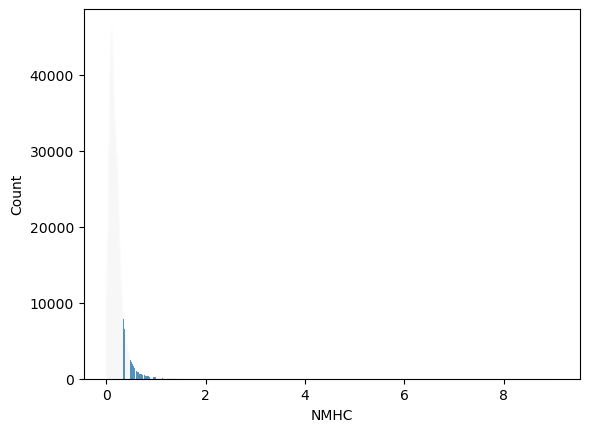

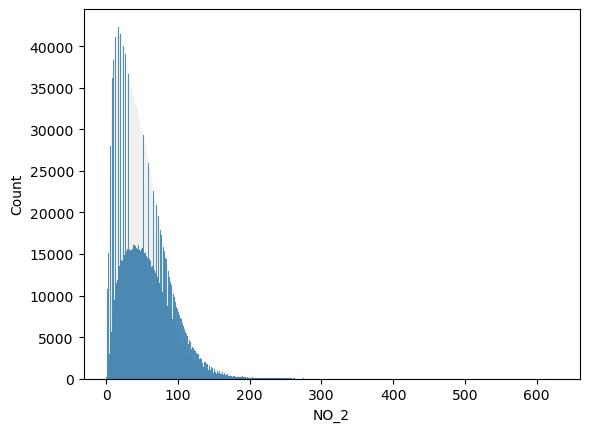

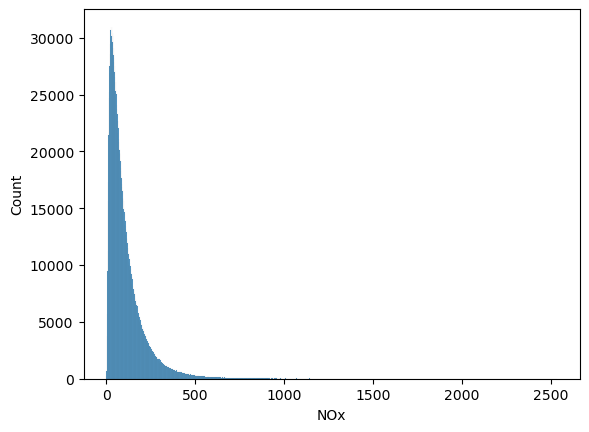

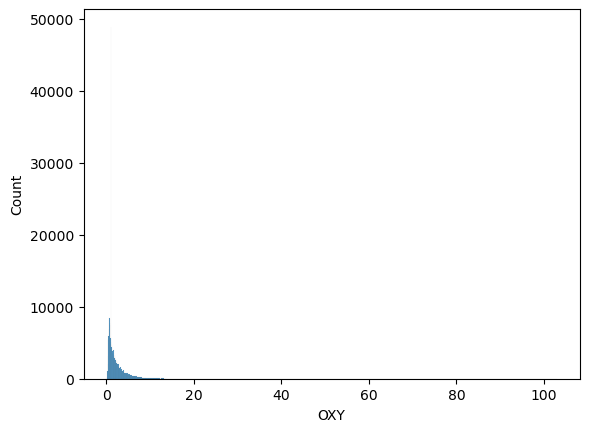

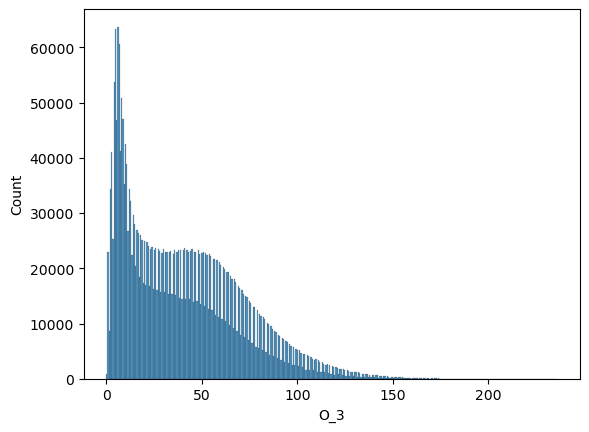

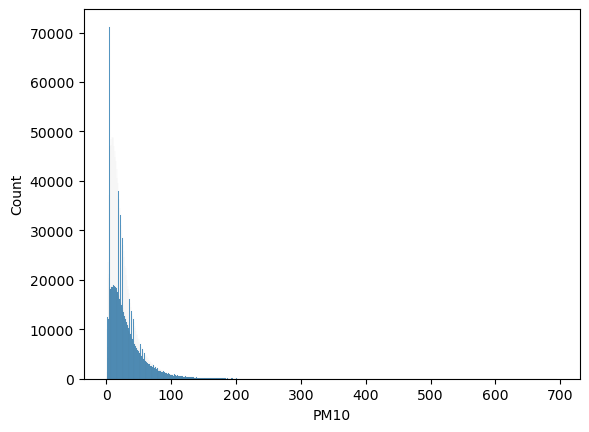

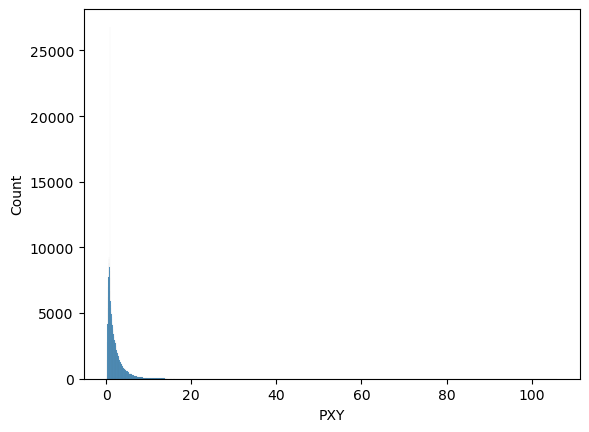

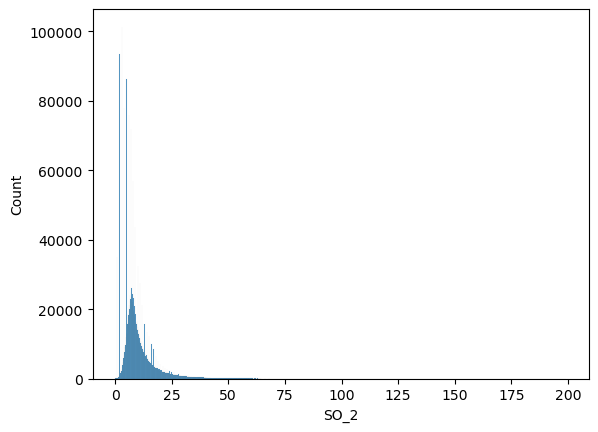

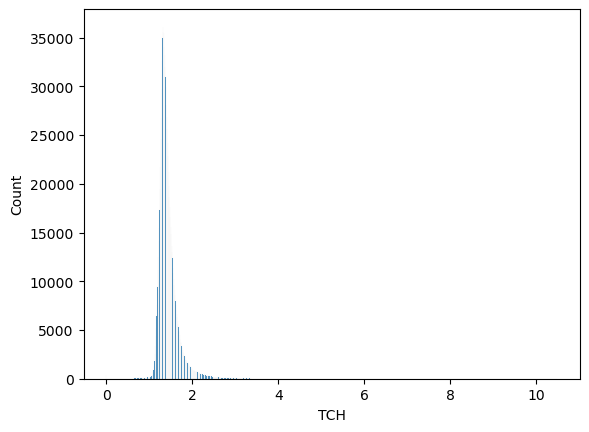

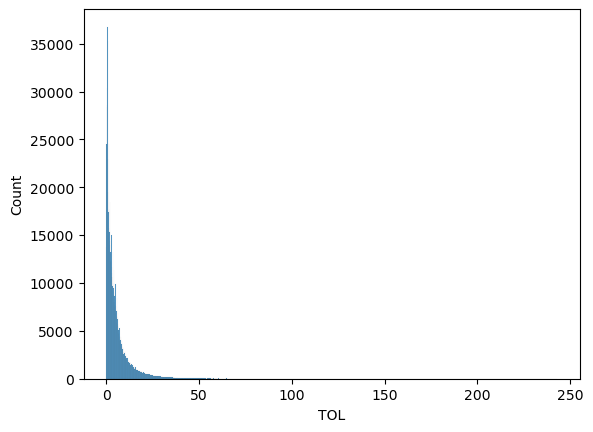

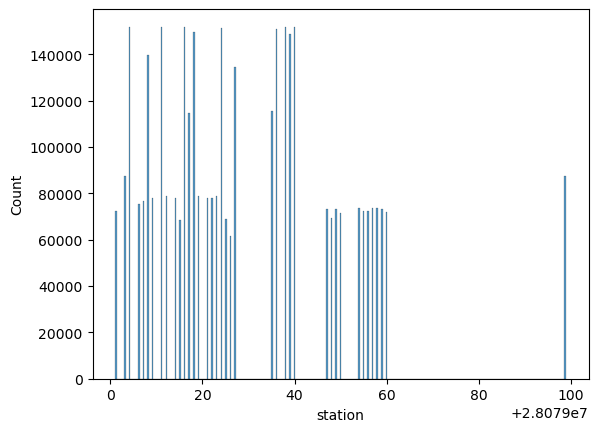

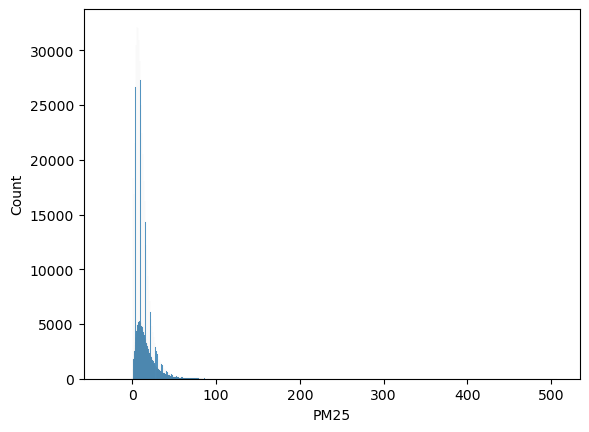

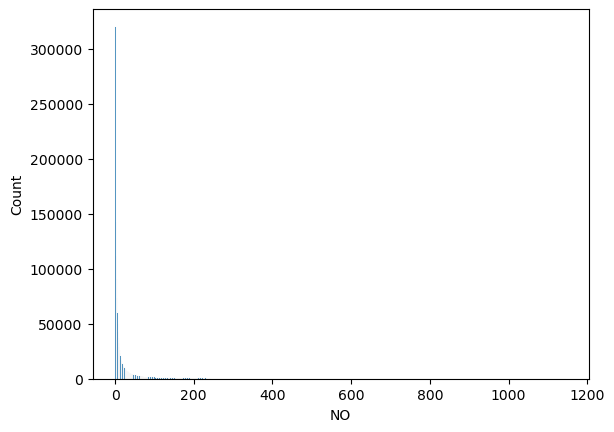

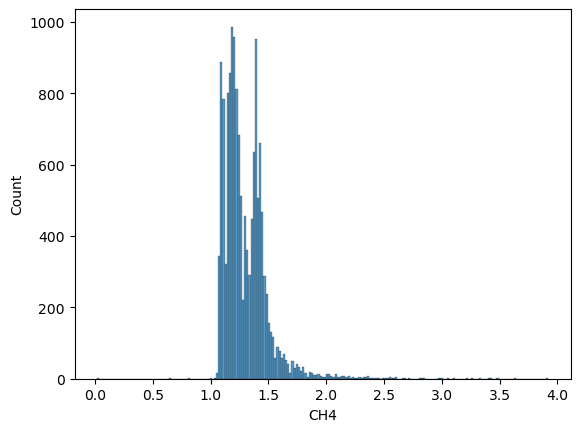

In [10]:
#step 4 exploratory Data Analysis (EDA)

#object value
print(df.describe(include='object'))
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

####KDE Plot for better understaning of Distribution

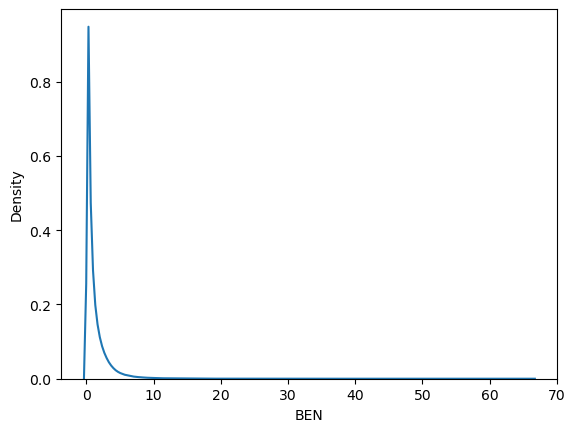

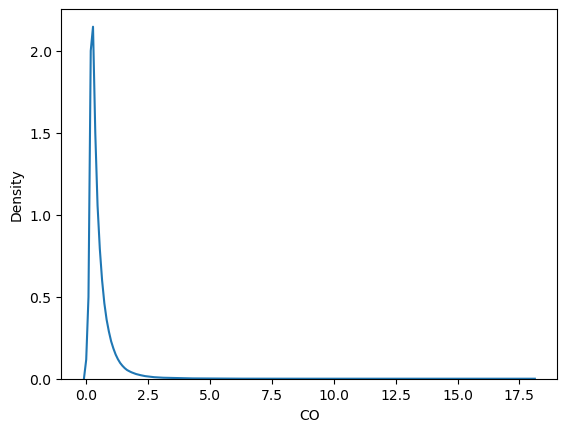

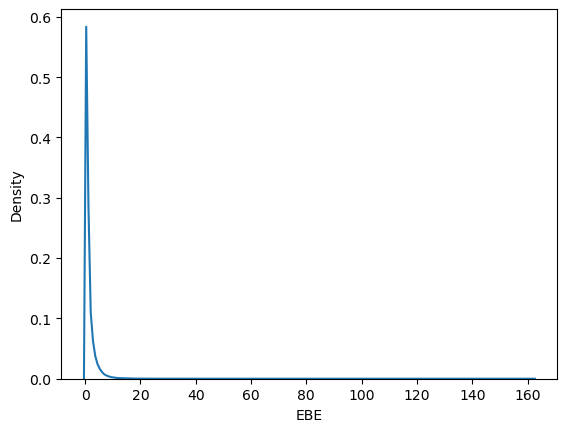

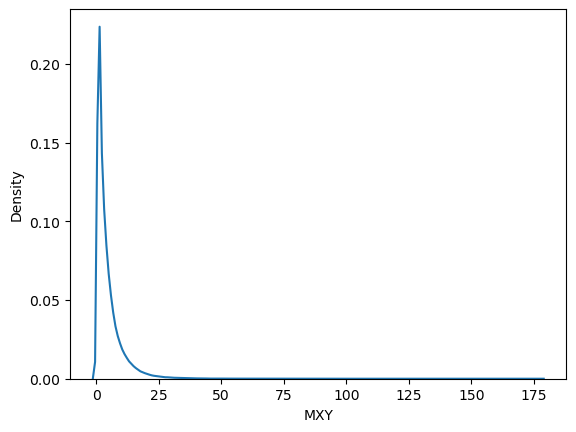

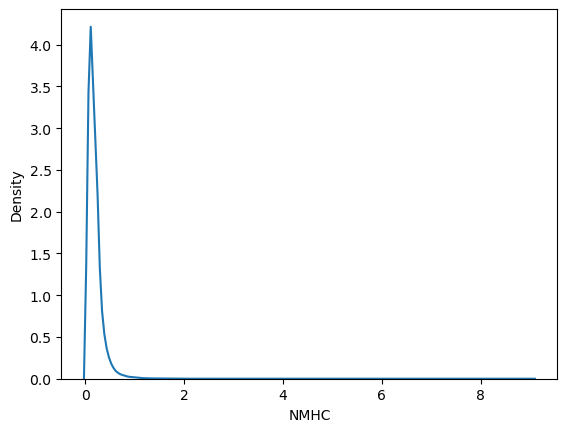

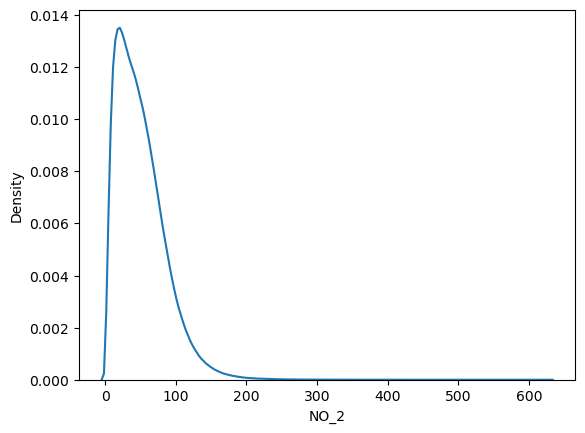

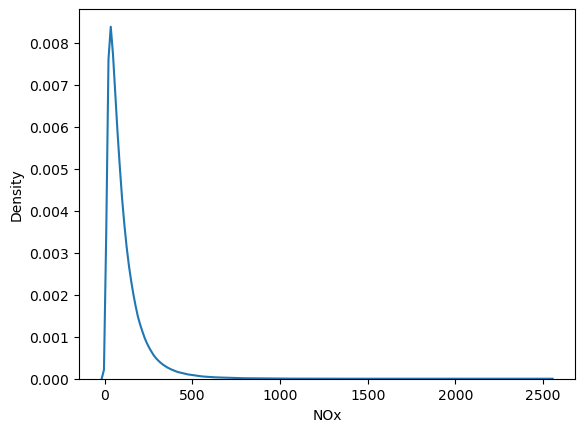

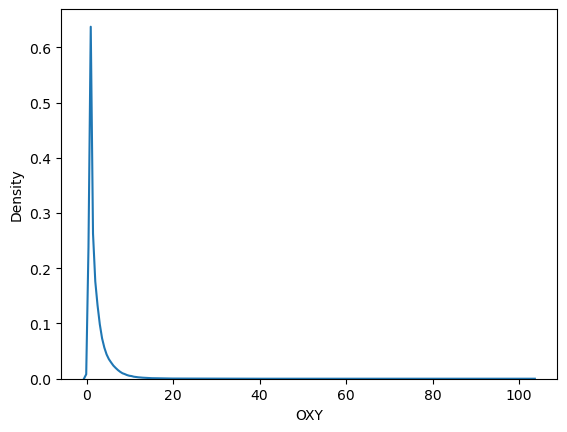

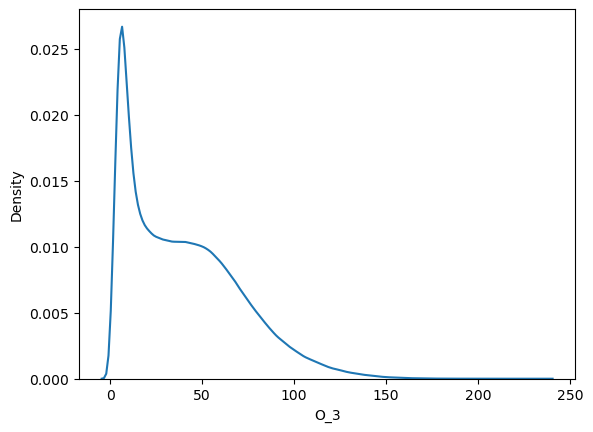

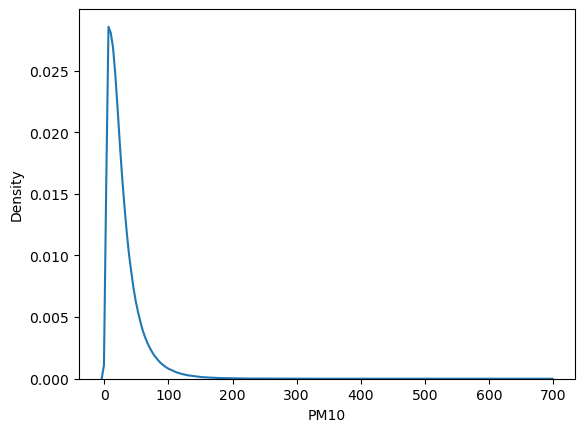

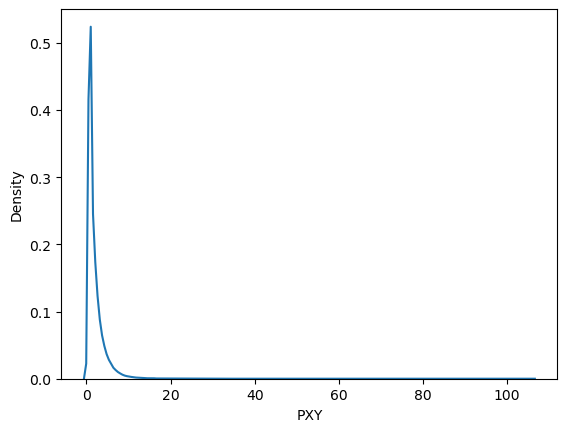

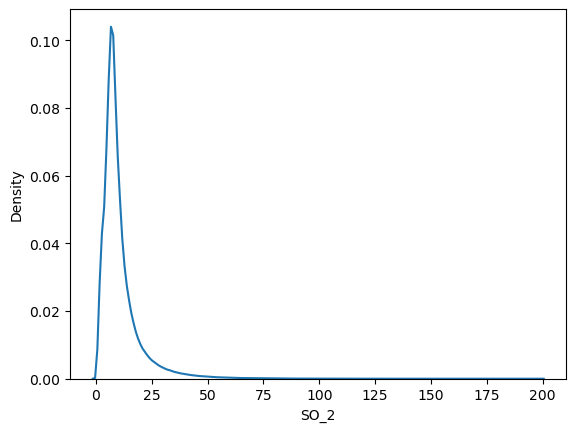

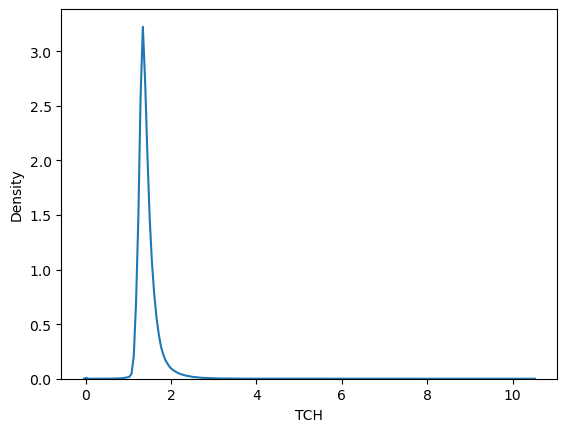

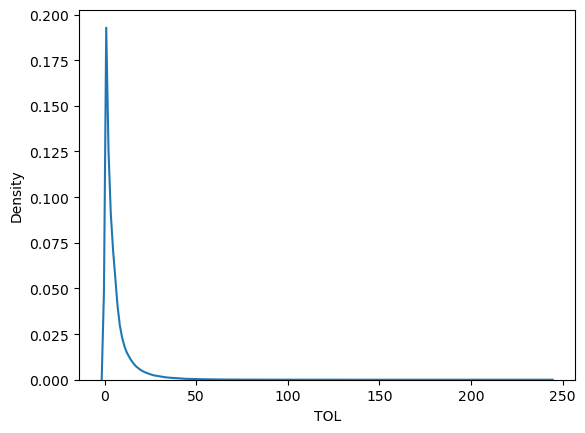

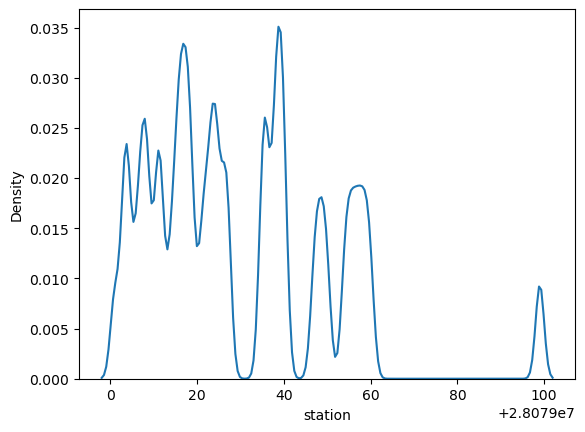

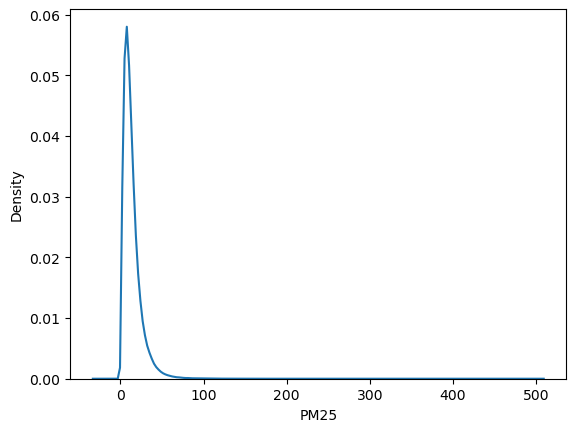

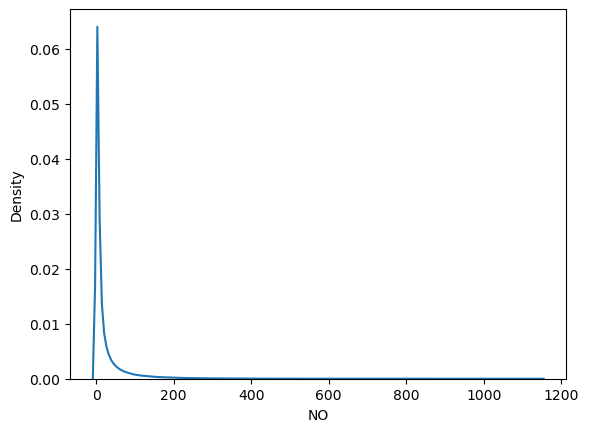

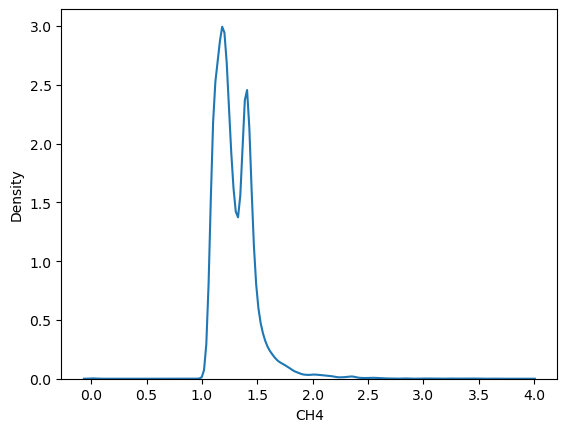

In [11]:
for i in df.select_dtypes(include=['number', 'datetime']).columns:
  sns.kdeplot(data=df, x=i)
  plt.show()

####Scatter plot to understanf the relationship

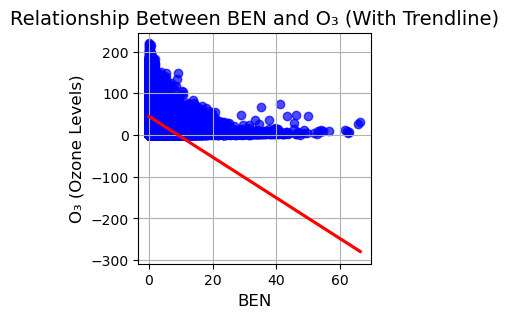

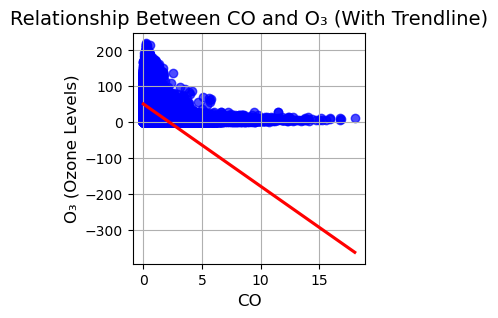

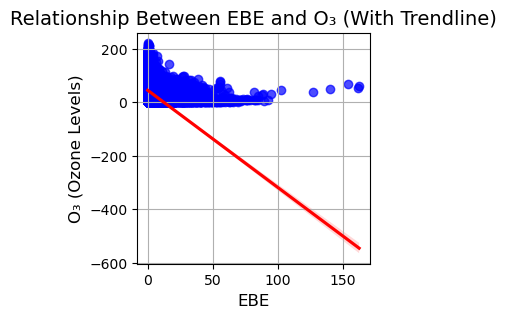

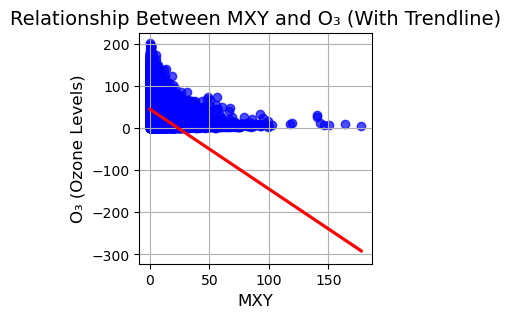

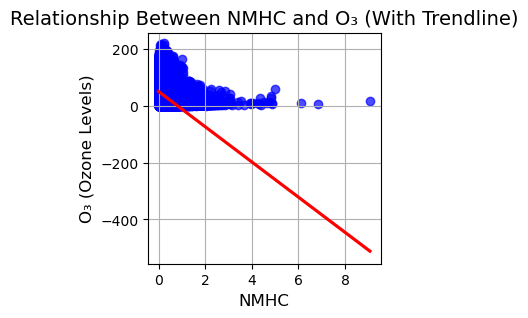

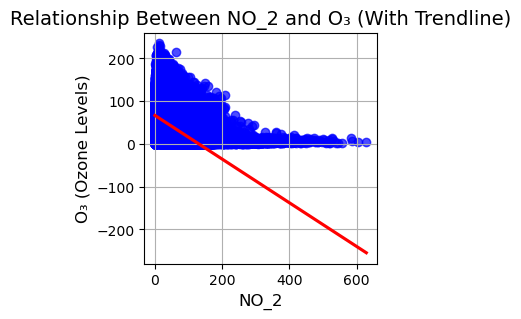

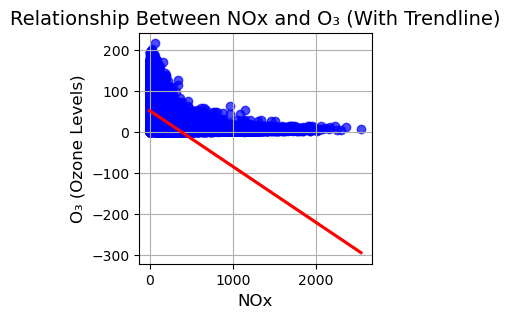

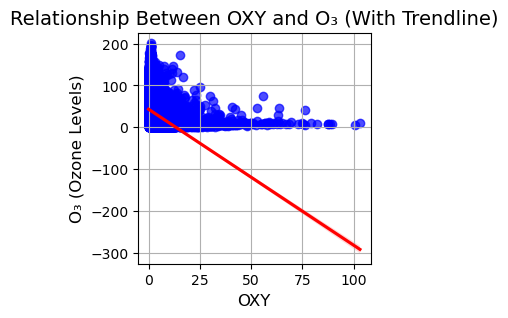

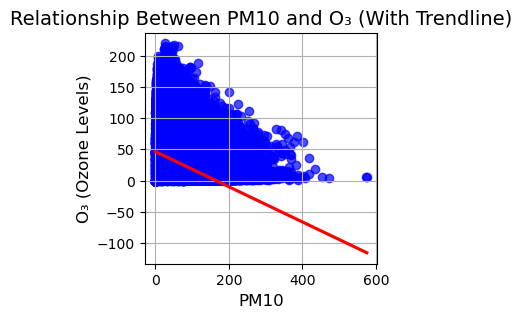

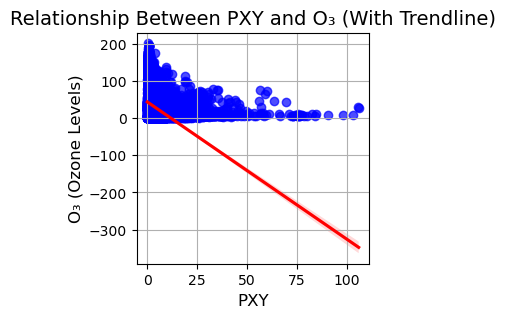

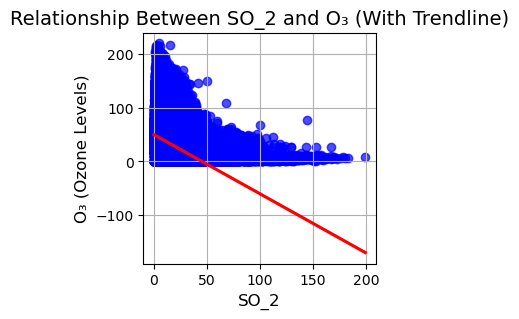

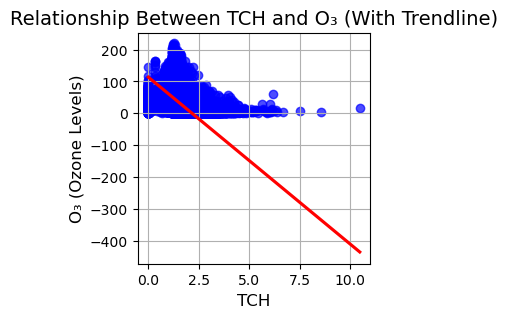

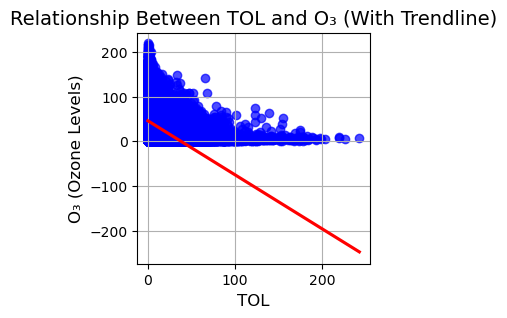

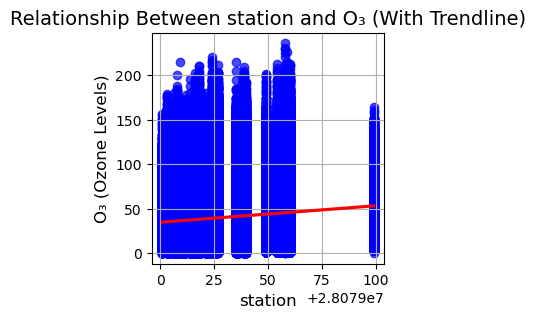

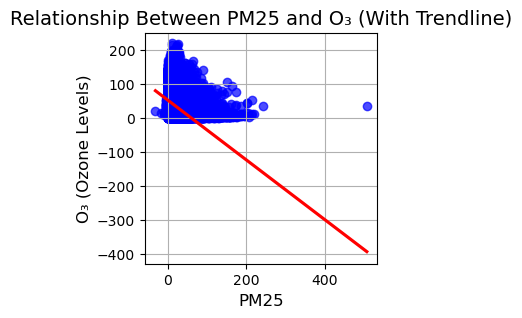

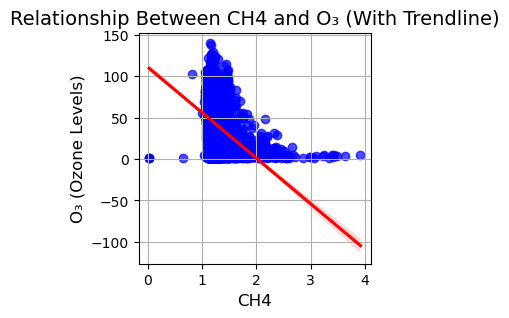

In [12]:
# # #scatter plot understand the relationship
## List of features to analyze


features = ['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station','PM25','CH4']

for feature in features:
        plt.figure(figsize=(3, 3))
        sns.regplot(
            data=df,
            x=feature,
            y='O_3',
            scatter_kws={'alpha': 0.7, 'color': 'blue'},
            line_kws={'color': 'red'}
        )
        plt.title(f'Relationship Between {feature} and O₃ (With Trendline)', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('O₃ (Ozone Levels)', fontsize=12)
        plt.grid(True)
        plt.show()


####Correlation with heatmap to intrepret the relation and multicollinarity

<Axes: >

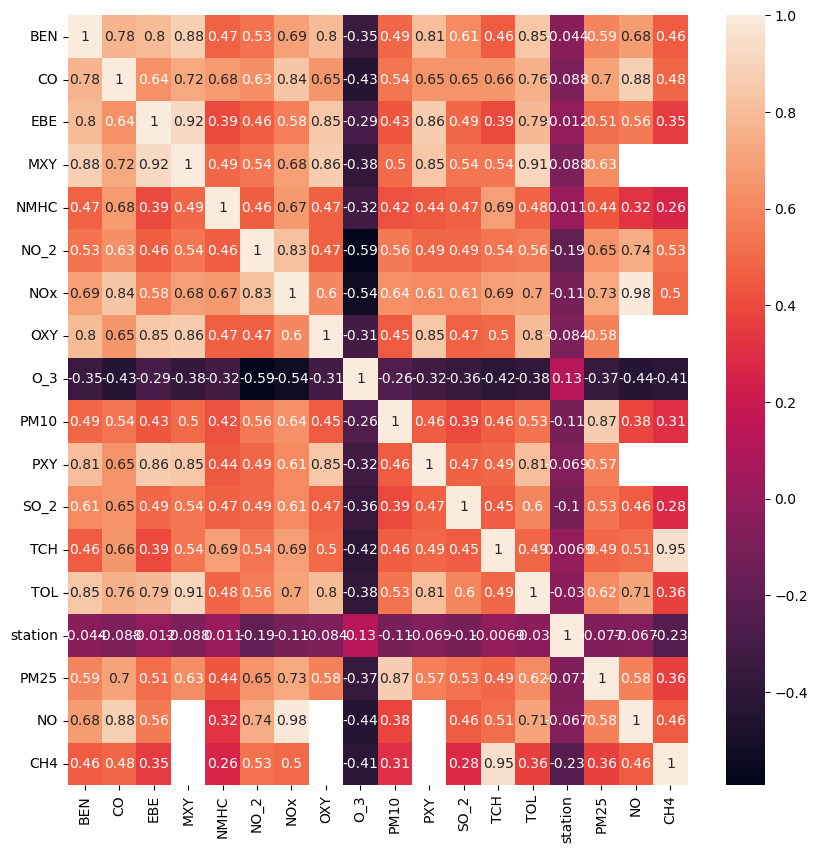

In [13]:
# correlation with heatmap to intrepret the relation and multicollinarity
df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

###Finding the outliers of the dataset using BoxPlot

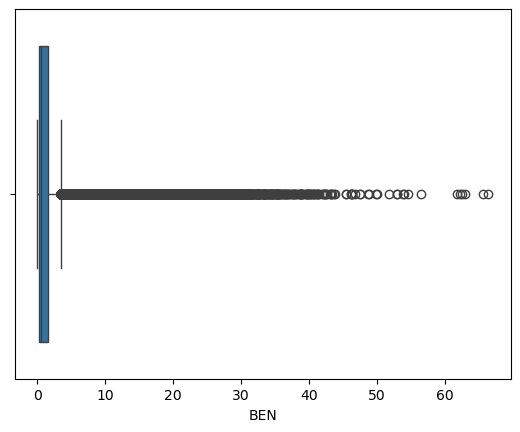

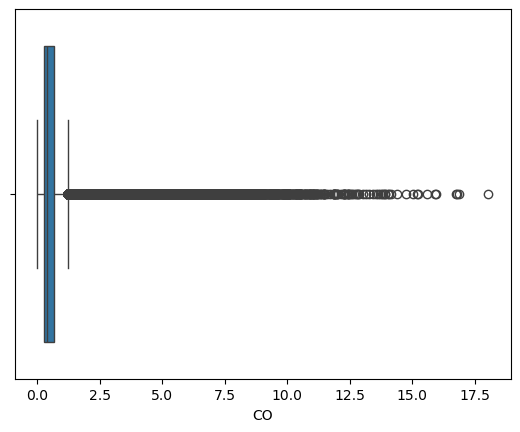

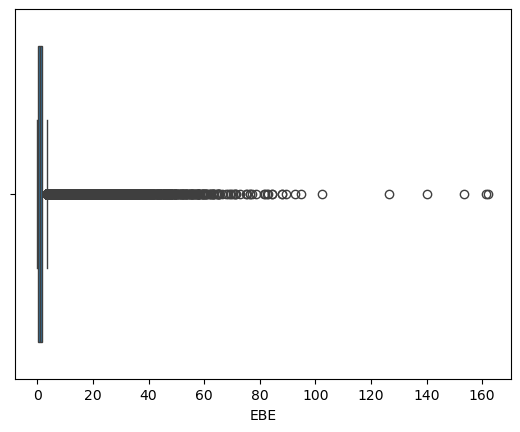

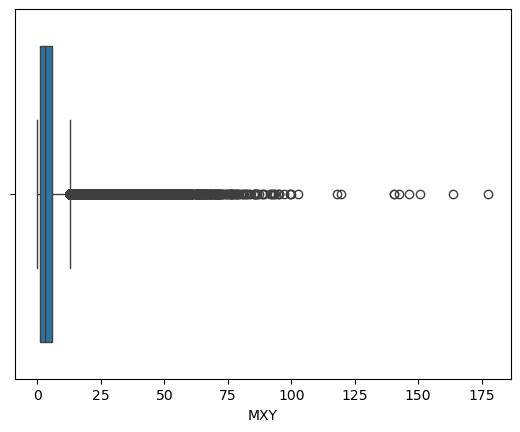

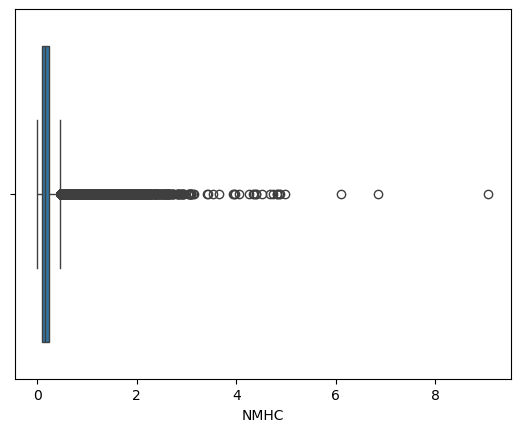

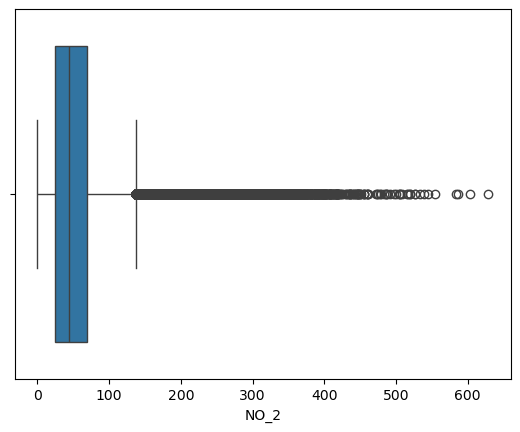

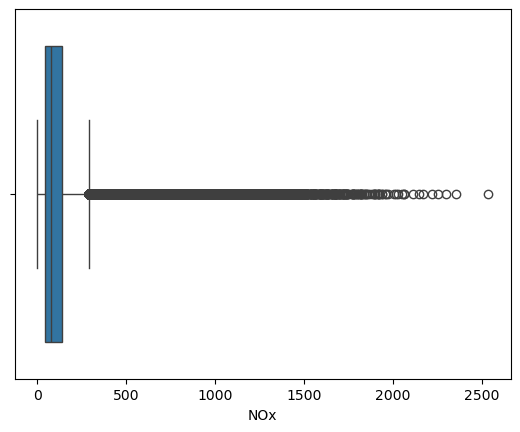

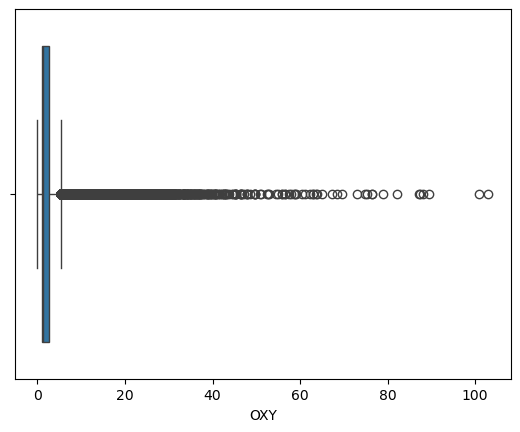

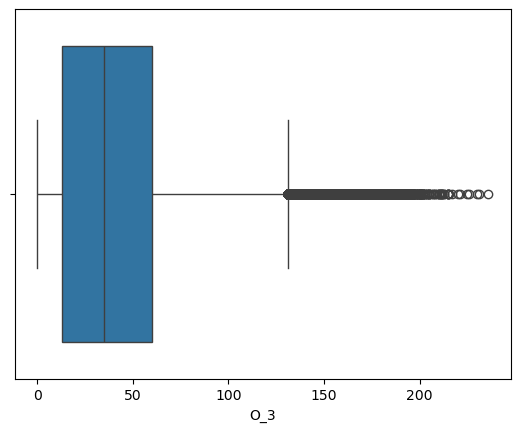

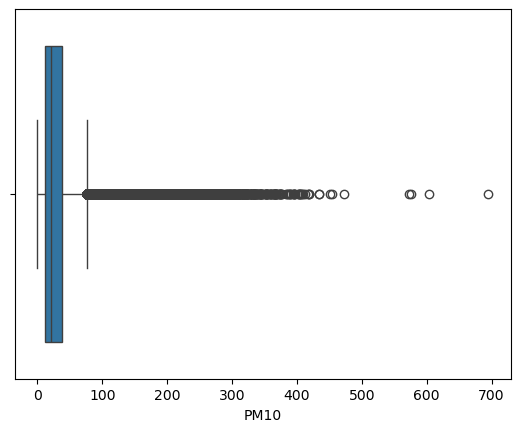

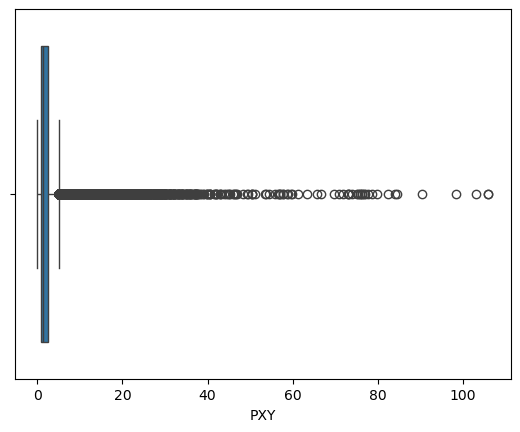

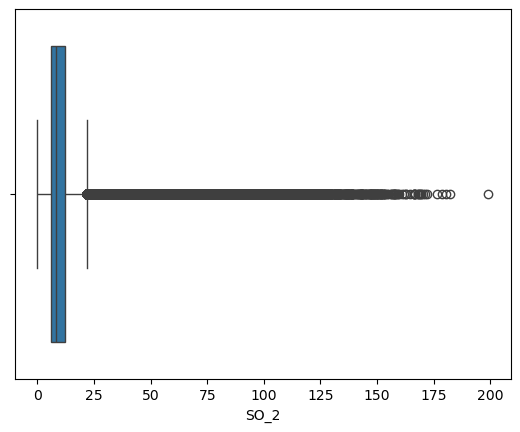

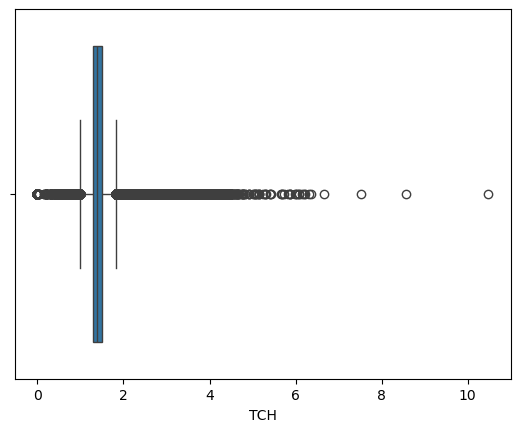

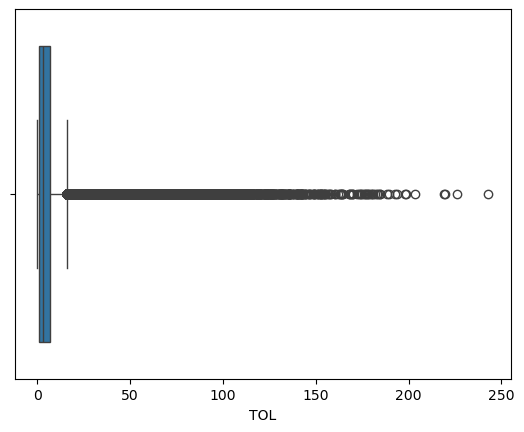

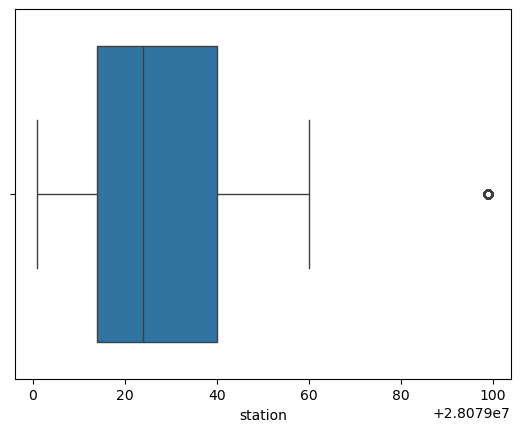

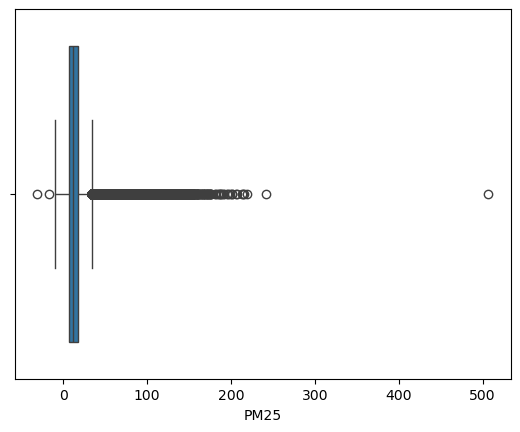

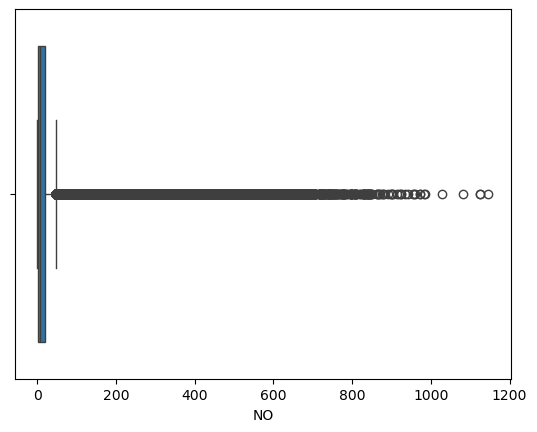

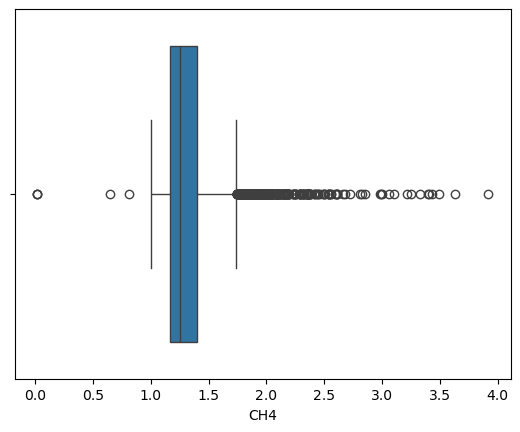

In [14]:
#box plot to understand the outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

#Data Cleaning

In [15]:
#finding missing value
print('Missing Value:')
print(df.isnull().sum())
print('***'*10)
#finding percantage of missing value
print('Percentage of Missing Value:')
print(df.isnull().sum()/df.shape[0]*100)
print('***'*10)
#finding duplicates
print('Duplicates:')
print(df.duplicated().sum())
print('***'*10)
#idenfying garbage value
print('Garbage Value:')
for i in df.select_dtypes(include='object').columns: #cz garbage are in object type value
   print(df[i].value_counts())
   print('***'*10)
# no garbage value as it would show in the last and show the character and the count also


Missing Value:
date             0
BEN        2766540
CO         1157212
EBE        2806500
MXY        3492809
NMHC       2722912
NO_2         21174
NOx        1431949
OXY        3492529
O_3         816492
PM10        946969
PXY        3492640
SO_2       1032264
TCH        2721783
TOL        2769295
station          0
PM25       2991800
NO         2275827
CH4        3793374
dtype: int64
******************************
Percentage of Missing Value:
date        0.000000
BEN        72.646462
CO         30.387183
EBE        73.695770
MXY        91.717530
NMHC       71.500836
NO_2        0.556007
NOx        37.601491
OXY        91.710178
O_3        21.440230
PM10       24.866421
PXY        91.713093
SO_2       27.106179
TCH        71.471190
TOL        72.718805
station     0.000000
PM25       78.561555
NO         59.760849
CH4        99.610054
dtype: float64
******************************
Duplicates:
0
******************************
Garbage Value:
2003-07-21 13:00:00    28
2003-06-15 03:00:00 

###dropping these features since the missing values percentage is greater than 50% and there are no duplicate value and Garbage values in the dataset


In [44]:
df=df.drop(['BEN', 'EBE','MXY', 'NMHC','TCH','OXY','PXY','TOL','station','date','PM25','CH4','NOx','NO'], axis = 1)
df.head()
#[Dropping station as it is irrelevant for our analysis]

,CO,NO_2,O_3,PM10,SO_2
0,0.37,58.400002,34.529999,105.000000,6.34
1,0.34,56.250000,42.160000,100.599998,8.11
2,0.28,50.660000,46.310001,100.099998,7.85
3,0.47,69.790001,40.650002,69.779999,6.46
4,0.39,22.830000,66.309998,75.180000,8.80


###Cleaning datas where target value (O_3) is Null

In [45]:
df= df.dropna(subset=['O_3']) #i deleted all null rows to check the result
# df= df.dropna(subset=['NO_2'])
# df= df.dropna(subset=['PM10'])
# df= df.dropna(subset=['CO'])
# df= df.dropna(subset=['SO_2'])

print('New Shape after dropping null rows of  value:')
df.shape

New Shape after dropping null rows of  value:


(2991732, 5)

###Imputing other NULL values using KNNI Imputer


In [5]:
df['CO'].fillna(df['CO'].mean(), inplace = True)
df['NO_2'].fillna(df['NO_2'].mean(), inplace = True)
df['PM10'].fillna(df['PM10'].mean(), inplace = True)
df['SO_2'].fillna(df['SO_2'].mean(), inplace = True)

In [6]:
print('Result After imputing:\n',df.isnull().sum())
df.shape

Result After imputing:
 CO      0
NO_2    0
O_3     0
PM10    0
SO_2    0
dtype: int64


(2991732, 5)

### Caluculating wisker to treat outliers

In [7]:
#Outlier treatment
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  return lower_bound,upper_bound
df.columns

Index(['CO', 'NO_2', 'O_3', 'PM10', 'SO_2'], dtype='object')

###Treating those values which have outliers

In [8]:
for i in ['CO','NO_2','PM10','SO_2']:
  lw,uk=wisker(df[i])
  df[i]=np.where(df[i]>uk,uk,df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])

###Checking if outliers are fixed or not

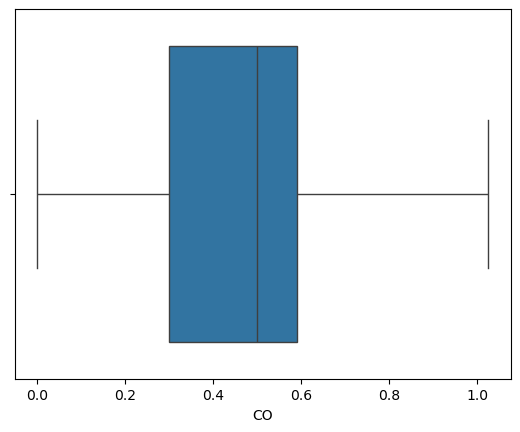

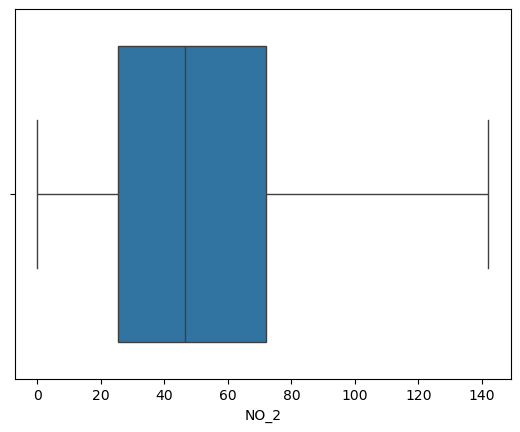

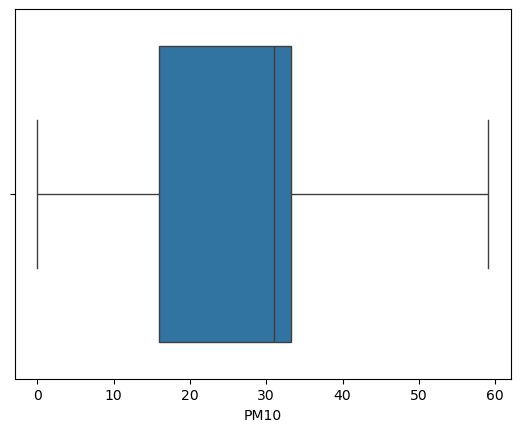

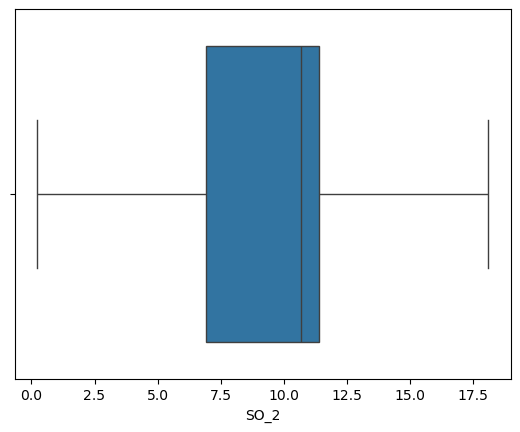

In [9]:
for i in ['CO','NO_2','PM10','SO_2']:
  sns.boxplot(data=df,x=i)
  plt.show()

####Data Before Cleaning Vs Data After Cleaning

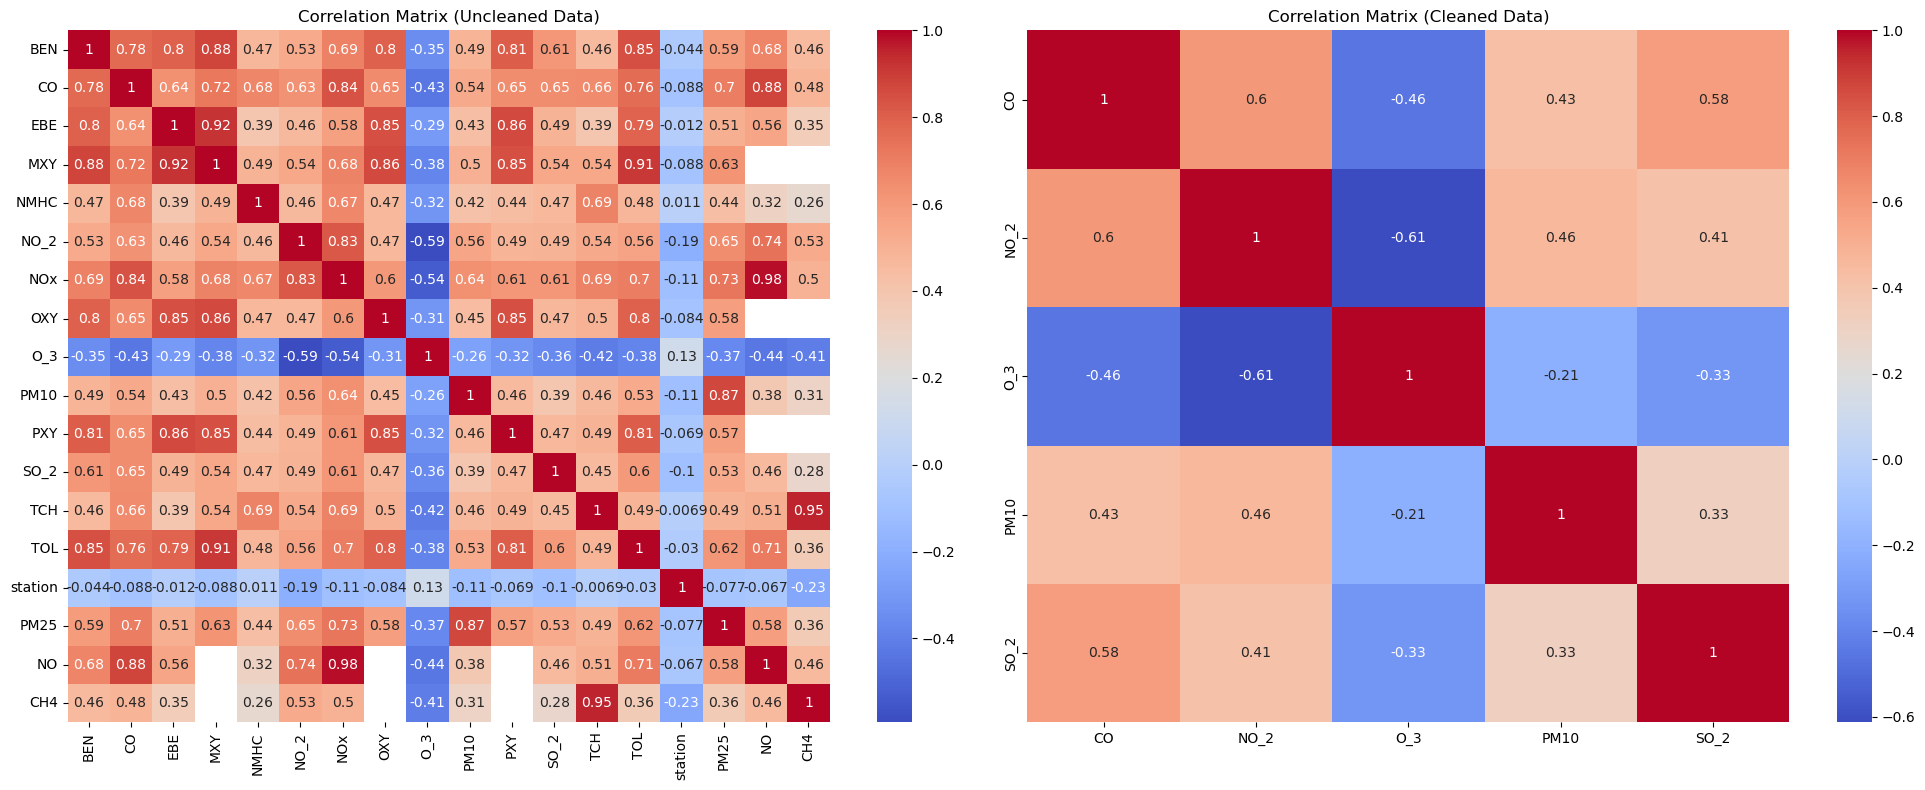

In [10]:

# Calculate correlation for uncleaned data
corr_uncleaned = df_init.select_dtypes(include='number').corr()

# Calculate correlation for cleaned data
corr_cleaned = df.select_dtypes(include='number').corr()

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for uncleaned data
sns.heatmap(corr_uncleaned, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix (Uncleaned Data)')

# Heatmap for cleaned data
sns.heatmap(corr_cleaned, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix (Cleaned Data)')

plt.tight_layout()
plt.show()

###Scalling the Data

In [11]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
print('Data Before Scalling:')
print(df.head())
print('Data After Scaling:')
print(df_scaled.head())

Data Before Scalling:
     CO       NO_2        O_3       PM10  SO_2
0  0.37  58.400002  34.529999  59.100004  6.34
1  0.34  56.250000  42.160000  59.100004  8.11
2  0.28  50.660000  46.310001  59.100004  7.85
3  0.47  69.790001  40.650002  59.100004  6.46
4  0.39  22.830000  66.309998  59.100004  8.80
Data After Scaling:
         CO      NO_2       O_3  PM10      SO_2
0  0.360976  0.411253  0.146314   1.0  0.341443
1  0.331707  0.396113  0.178644   1.0  0.440436
2  0.273171  0.356748  0.196229   1.0  0.425895
3  0.458537  0.491462  0.172246   1.0  0.348154
4  0.380488  0.160769  0.280975   1.0  0.479027


###Splitting Datset

In [13]:
# x=df_scaled.drop('O_3',axis=1)
# y=df_scaled['O_3']
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# df_scaled.tail()

df_scaled_cudf = cudf.DataFrame.from_pandas(df_scaled)

# Drop the 'O_3' column from x (predictors) and assign it to y (target)
x = df_scaled_cudf.drop('O_3', axis=1)
y = df_scaled_cudf['O_3']

# Split the data into training and test sets using cuml's train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Check the tail of the cuDF DataFrame
print(df_scaled_cudf.tail())

               CO      NO_2       O_3      PM10      SO_2
2991727  0.554787  1.000000  0.008475  0.525141  0.623068
2991728  0.487805  0.640823  0.004237  0.592217  0.623068
2991729  0.554787  0.338016  0.008475  0.525141  0.623068
2991730  0.554787  0.725327  0.008475  0.525141  0.623068
2991731  0.554787  0.676033  0.012712  0.439932  0.623068


#Model Train

### 1. Linear Regression

In [16]:

model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [17]:
y_predict=model1.predict(x_test)

Mean Absolute Error (MAE): 0.07701293111920618
Explained Variance Score: 0.40139815623400665
Mean of Residuals (in percentage): 0.007396127963061681%


<Axes: ylabel='Density'>

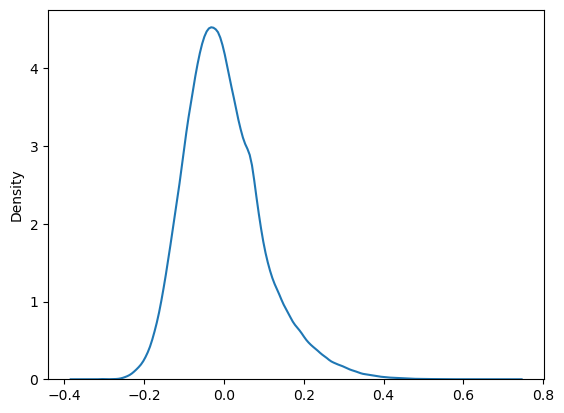

In [32]:
import cudf
import cupy as cp
import seaborn as sns
from cuml.metrics import mean_absolute_error

# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_test_gpu = y_test.to_cupy()  # Convert to cuPy array for GPU-based operations
y_predict_gpu1 = y_predict.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae1 = mean_absolute_error(y_test_gpu, y_predict_gpu1)

# Manually calculate Explained Variance Score
residuals1 = y_test_gpu - y_predict_gpu1
explained_variance1 = 1 - cp.var(residuals1) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae1}")
print(f"Explained Variance Score: {explained_variance1}")

# Residual Calculation
residue_gpu1 = residuals1
print(f"Mean of Residuals (in percentage): {residue_gpu1.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu1.get())  # .get() moves the data to CPU for plotting


### 2. Random Forest Regressor

In [25]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

/home/abir_hossain/anaconda3/envs/P2/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


RandomForestRegressor()

In [26]:
y_predict2=model2.predict(x_test)

Mean Absolute Error (MAE): 0.06664095789805333
Explained Variance Score: 0.5075479779398462
Mean of Residuals (in percentage): -0.01958416939135167%


<Axes: ylabel='Density'>

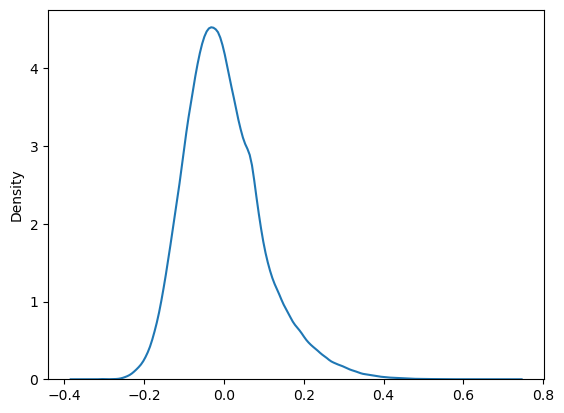

In [33]:

# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_predict_gpu2 = y_predict2.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae2 = mean_absolute_error(y_test_gpu, y_predict_gpu2)

# Manually calculate Explained Variance Score
residuals2 = y_test_gpu - y_predict_gpu2
explained_variance2 = 1 - cp.var(residuals2) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae2}")
print(f"Explained Variance Score: {explained_variance2}")

# Residual Calculation
residue_gpu2 = residuals2
print(f"Mean of Residuals (in percentage): {residue_gpu2.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu.get())  # .get() moves the data to CPU for plotting


###5. Ridge Regressor

In [39]:
model5=Ridge(alpha=0.1)
model5.fit(x_train,y_train)


Ridge()

In [40]:
y_predict5=model5.predict(x_test)

Mean Absolute Error (MAE): 0.07701292944155229
Explained Variance Score: 0.4013981560354011
Mean of Residuals (in percentage): 0.0073961402784221844%


<Axes: ylabel='Density'>

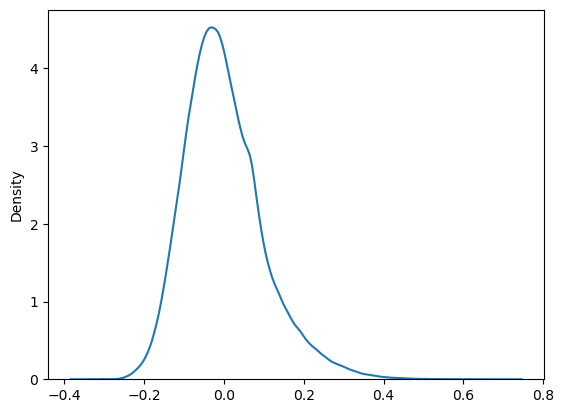

In [41]:


# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_predict_gpu5 = y_predict5.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae5 = mean_absolute_error(y_test_gpu, y_predict_gpu5)

# Manually calculate Explained Variance Score
residuals5 = y_test_gpu - y_predict_gpu5
explained_variance5 = 1 - cp.var(residuals5) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae5}")
print(f"Explained Variance Score: {explained_variance5}")

# Residual Calculation
residue_gpu5 = residuals5
print(f"Mean of Residuals (in percentage): {residue_gpu5.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu5.get())  # .get() moves the data to CPU for plotting


#Performance Comparison

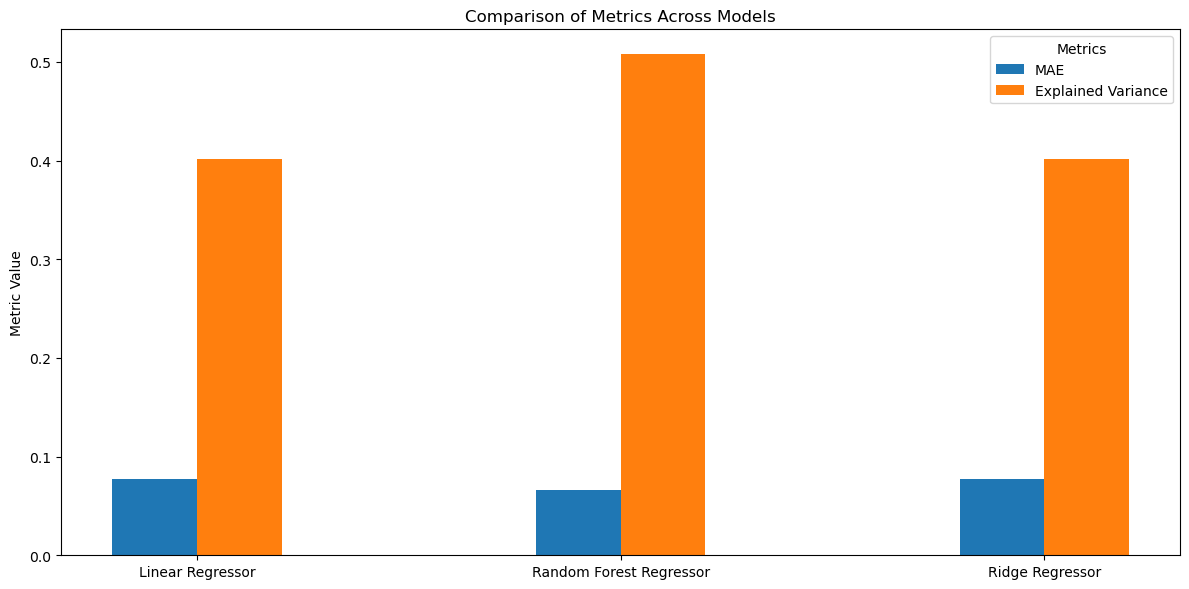

In [42]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

# Example values for metrics (ensure that these are CuPy arrays or GPU-based)Mean Absolute Error (MAE):


l_mae1 = cp.array([0.07701293111920618])  # Replace with actual GPU results
l_mae2 = cp.array([0.06664095789805333])
l_mae5 = cp.array([0.07701292944155229])

explained_variance1 = cp.array([0.40139815623400665])
explained_variance2 = cp.array([0.5075479779398462])
explained_variance5 = cp.array([0.4013981560354011])

# Convert CuPy arrays to NumPy arrays for compatibility with plotting
metric_values = np.array([
    [l_mae1.get()[0], l_mae2.get()[0], l_mae5.get()[0]],  # Access scalar values
    [explained_variance1.get()[0], explained_variance2.get()[0], explained_variance5.get()[0]],  # Access scalar values
])

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
model_names = ["Linear Regressor", "Random Forest Regressor", 'Ridge Regressor']
metrics = ["MAE", "Explained Variance"]
x = np.arange(len(model_names))

bar_width = 0.2
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, metric_values[i], width=bar_width, label=metric)

ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names)
ax.set_ylabel("Metric Value")
ax.set_title("Comparison of Metrics Across Models")
ax.legend(title="Metrics")
plt.tight_layout()
plt.show()
